In [1]:
import cv2
import numpy as np
import math

In [2]:
img = None
igg = 5
def load_image():
    global img
    path = input("Enter image path (e.g., image.jpg): ")
    loaded_img = cv2.imread(path, 0) 
    if loaded_img is None:
        print("Error: Could not read image. Check the path.")
    else:
        img = loaded_img
        print(f"Image loaded successfully! Size: {img.shape}")
    if img is not None:
        import matplotlib.pyplot as plt
        plt.imshow(img, cmap="gray")
        plt.axis("off")
        plt.show()


In [3]:
def get_coords(prompt="Enter coordinates (x y): "):
    try:
        user_input = input(prompt).split()
        x, y = int(user_input[0]), int(user_input[1])
        return x, y
    except:
        print("Invalid input.")
        return None, None


In [4]:
def task_neighborhoods():
    if img is None: print("Load image first!"); return
    x, y = get_coords("Enter pixel coordinate (x y): ")
    if x is None: return

    rows, cols = img.shape
    if not (0 <= x < cols and 0 <= y < rows):
        print("Coordinates out of bounds.")
        return

    n4 = []
    n8 = []
    
    for dy in [-1, 0, 1]:
        for dx in [-1, 0, 1]:
            if dx == 0 and dy == 0: continue 
            
            nx, ny = x + dx, y + dy
            
            if 0 <= nx < cols and 0 <= ny < rows:
                dist = abs(dx) + abs(dy)
                pixel_val = img[ny, nx] 
                
                n8.append(f"({nx},{ny}):{pixel_val}")
                
                if dist == 1:
                    n4.append(f"({nx},{ny}):{pixel_val}")

    print(f"\nPixel ({x},{y}) Value: {img[y, x]}")
    print(f"4-Neighborhood: {n4}")
    print(f"8-Neighborhood: {n8}")

In [5]:
def task_adjacency():
    print("Check if two pixels are adjacent.")
    x1, y1 = get_coords("Enter Pixel 1 (x y): ")
    x2, y2 = get_coords("Enter Pixel 2 (x y): ")
    if x1 is None or x2 is None: return

    dx = abs(x1 - x2)
    dy = abs(y1 - y2)
    
    is_4_adj = (dx + dy == 1)
    
    is_8_adj = (max(dx, dy) == 1)

    print(f"\nAre they 4-Adjacent? {is_4_adj}")
    print(f"Are they 8-Adjacent? {is_8_adj}")

In [6]:
def task_distances():
    print("Compute distances between two pixels.")
    x1, y1 = get_coords("Enter Pixel 1 (x y): ")
    x2, y2 = get_coords("Enter Pixel 2 (x y): ")
    if x1 is None or x2 is None: return

    euclidean = math.sqrt((x1 - x2)**2 + (y1 - y2)**2)
    
    city_block = abs(x1 - x2) + abs(y1 - y2)
    
    chessboard = max(abs(x1 - x2), abs(y1 - y2))

    print(f"\nEuclidean Distance: {euclidean:.2f}")
    print(f"City Block Distance: {city_block}")
    print(f"Chessboard Distance: {chessboard}")

In [7]:
def task_connected_components():
    if img is None: print("Load image first!"); return
    
    _, binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    
    num_labels, labels = cv2.connectedComponents(binary_img)
    
    print(f"\nFound {num_labels - 1} connected components (excluding background).")
    
    label_hue = np.uint8(179 * labels / np.max(labels))
    blank_ch = 255 * np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
    
    labeled_img[labels == 0] = 0
    
    # Resize images to fit on screen (max 800px width)
    max_width = 800
    height, width = img.shape
    if width > max_width:
        scale = max_width / width
        new_width = max_width
        new_height = int(height * scale)
        
        img_resized = cv2.resize(img, (new_width, new_height))
        binary_resized = cv2.resize(binary_img, (new_width, new_height))
        labeled_resized = cv2.resize(labeled_img, (new_width, new_height))
    else:
        img_resized = img
        binary_resized = binary_img
        labeled_resized = labeled_img
    
    cv2.imshow('Original Image', img_resized)
    cv2.imshow("Binary Image", binary_resized)
    cv2.imshow('Connected Components', labeled_resized)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [8]:
def task_pixel_connectivity():
    if img is None: print("Load image first!"); return
    print("Checking connectivity (Path existence) between two pixels in Binary Image.")
    
    x1, y1 = get_coords("Enter Start Pixel (x y): ")
    x2, y2 = get_coords("Enter End Pixel (x y): ")
    if x1 is None or x2 is None: return
    
    rows, cols = img.shape
    
    
    _, bin_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    
    if bin_img[y1, x1] == 0 or bin_img[y2, x2] == 0:
        print("One of the pixels is background (0). Cannot be connected.")
        return

    def has_path(conn_type):
        visited = np.zeros_like(bin_img, dtype=bool)
        stack = [(x1, y1)]
        visited[y1, x1] = True
        
        while stack:
            cx, cy = stack.pop()
            if cx == x2 and cy == y2:
                return True
        
            if conn_type == 4:
                shifts = [(0,1), (0,-1), (1,0), (-1,0)]
            else: 
                shifts = [(0,1), (0,-1), (1,0), (-1,0), (1,1), (1,-1), (-1,1), (-1,-1)]
            
            for dx, dy in shifts:
                nx, ny = cx + dx, cy + dy
                if 0 <= nx < cols and 0 <= ny < rows:
                    if not visited[ny, nx] and bin_img[ny, nx] > 0:
                        visited[ny, nx] = True
                        stack.append((nx, ny))
        return False

    print(f"4-Connectivity Path Exists: {has_path(4)}")
    print(f"8-Connectivity Path Exists: {has_path(8)}")


--- IMAGE PROCESSING MENU ---
1. Load Image
2. 4 & 8 Neighborhoods
3. Check Adjacency
4. Compute Distances
5. Find Connected Components
6. Check Connectivity (Path)
0. Exit
Image loaded successfully! Size: (1280, 960)


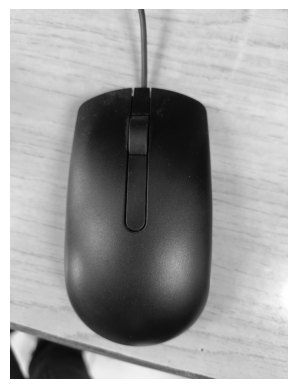


--- IMAGE PROCESSING MENU ---
1. Load Image
2. 4 & 8 Neighborhoods
3. Check Adjacency
4. Compute Distances
5. Find Connected Components
6. Check Connectivity (Path)
0. Exit

Pixel (10,20) Value: 221
4-Neighborhood: ['(10,19):221', '(9,20):221', '(11,20):222', '(10,21):222']
8-Neighborhood: ['(9,19):221', '(10,19):221', '(11,19):221', '(9,20):221', '(11,20):222', '(9,21):221', '(10,21):222', '(11,21):222']

--- IMAGE PROCESSING MENU ---
1. Load Image
2. 4 & 8 Neighborhoods
3. Check Adjacency
4. Compute Distances
5. Find Connected Components
6. Check Connectivity (Path)
0. Exit
Exiting...


In [9]:
while True:
    print("\n--- IMAGE PROCESSING MENU ---")
    print("1. Load Image")
    print("2. 4 & 8 Neighborhoods")
    print("3. Check Adjacency")
    print("4. Compute Distances")
    print("5. Find Connected Components")
    print("6. Check Connectivity (Path)")
    print("0. Exit")
    
    choice = input("Enter your choice: ")
    
    if choice == '1':
        load_image()
    elif choice == '2':
        task_neighborhoods()
    elif choice == '3':
        task_adjacency()
    elif choice == '4':
        task_distances()
    elif choice == '5':
        task_connected_components()
    elif choice == '6':
        task_pixel_connectivity()
    elif choice == '0':
        print("Exiting...")
        break
    else:
        print("Invalid choice, try again.")